# **Deteksi Dini Kanker Payudara Melalui Pemeriksaan Mammografi**

# **Pendahuluan**


Kanker payudara merupakan salah satu jenis penyakit kanker yang paling sering terjadi dan menjadi penyebab kematian utama pada wanita di berbagai belahan dunia. Penyakit ini muncul akibat pertumbuhan sel abnormal pada jaringan payudara yang tidak terkendali. Jika tidak didiagnosis dan ditangani sejak awal, sel-sel tersebut dapat menyebar ke organ lain. Oleh karena itu, proses deteksi dini menjadi sangat krusial untuk meningkatkan kemungkinan keberhasilan pengobatan serta menurunkan risiko kematian akibat penyakit ini.

Salah satu metode yang banyak digunakan dalam pemeriksaan awal kanker payudara adalah mammografi, yaitu teknik pencitraan dengan sinar-X yang dapat mendeteksi adanya kelainan di jaringan payudara. Dari hasil pencitraan ini, sering kali ditemukan massa atau benjolan yang mencurigakan. Istilah mammographic mass merujuk pada benjolan yang tampak pada citra mammografi. Massa tersebut dapat bersifat tidak berbahaya (jinak) atau bersifat ganas (kanker), sehingga perlu dilakukan analisis lebih lanjut untuk menentukan sifat dan potensi bahayanya.

Untuk membantu proses evaluasi, para ahli biasanya menilai beberapa ciri dari massa tersebut, seperti bentuk (shape), batas tepi (margin), dan kepadatan (density). Penilaian terhadap karakteristik ini sangat berguna dalam memperkirakan kemungkinan keganasan suatu massa. Informasi ini juga menjadi dasar dalam pengambilan keputusan medis selanjutnya, apakah pasien perlu menjalani pemeriksaan lanjutan seperti biopsi atau cukup dengan pemantauan rutin.

## **Data Set**

Data diambil dari https://archive.ics.uci.edu/dataset/14/breast+cancer.

Yaitu data Kanker Payudara dengan jumlah data sebanyak 286 data dan 9 fitur.

Untuk memproses dan menganalisis data ini, langkah awal yang perlu dilakukan adalah mengunduh dan mengimpor dataset ke dalam lingkungan pemrograman seperti Python. Dataset ini dapat diakses secara langsung melalui UCI Machine Learning Repository.

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer = fetch_ucirepo(id=14)

# data (as pandas dataframes)
X = breast_cancer.data.features
y = breast_cancer.data.targets

# metadata
print(breast_cancer.metadata)

# variable information
print(breast_cancer.variables)

{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'Thi

## **Tujuan**

 Dataset ini digunakan untuk menyediakan data yang dapat digunakan dalam pengembangan model klasifikasi guna membedakan antara massa jinak dan massa ganas pada citra mammografi, sehingga dapat membantu dalam deteksi dini kanker payudara dan mengurangi prosedur biopsi yang tidak perlu.











## **Data Understanding**

### a. Penjelasan Fitur

- Class = Kelas target yang menunjukkan apakah kejadian kanker berulang atau tidak setelah pengobatan awal.
- Age = Rentang usia pasien dalam tahun.
- Menopause = Status menopause pasien.
- Tumor-Size =  Ukuran tumor dalam mm.
- Inv-Nodes = Jumlah kelenjar getah bening yang terlibat.
- Node-caps = Apakah kapsul node terlibat atau tidak.
- deg-malig = Derajat keganasan tumor (1 = rendah, 2 = sedang, 3 = tinggi).
- Breast = Sisi payudara yang terkena (kiri atau kanan).
- Breast-quad =  Lokasi kuadran payudara yang terkena.
- Irradiat = Apakah pasien mendapat radiasi atau tidak.

### b. Ekplorasi Data

In [ ]:
import pandas as pd

# Ubah ke DataFrame untuk memudahkan eksplorasi
df = pd.DataFrame(data=X, columns=breast_cancer.feature_names)
df['target'] = y  # Tambahkan target ke DataFrame

# Info data untuk melihat jumlah data dan tipe fitur
print(df.info())

# Tampilkan beberapa baris pertama data
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   target       286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB
None
     age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0  30-39   premeno      30-34       0-2        no          3   left   
1  40-49   premeno      20-24       0-2        no          2  right   
2  40-49   premeno      20-24       0-2        no          2   left   
3  60-69      ge40      15-19       0-2        no          2  r

🔍 Kesimpulan :

- Jumlah data: 286 entri, 10 kolom (mayoritas kategori).

- Tipe data: Sebagian besar bertipe object, hanya deg-malig numerik.

- Missing values: Ada pada node-caps (8) dan breast-quad (1).

- Fitur penting: age, menopause, tumor-size, inv-nodes, node-caps, deg-malig, dst.

- Target: Dua kelas — no-recurrence-events dan recurrence-events.

### c. Visualisasi Data

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Ambil dataset
breast_cancer = fetch_ucirepo(id=14)

# Gabungkan fitur dan target
df = pd.DataFrame(data=breast_cancer.data.features, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.data.targets

# Atur agar semua kolom tampil secara horizontal
pd.set_option('display.max_columns', None)       # Tampilkan semua kolom
pd.set_option('display.expand_frame_repr', False)  # Jangan potong ke bawah

# Tampilkan data
print(df)

# Simpan ke CSV
df.to_csv('breast_cancer_full.csv', index=False)

       age menopause tumor-size inv-nodes node-caps  deg-malig breast breast-quad irradiat                target
0    30-39   premeno      30-34       0-2        no          3   left    left_low       no  no-recurrence-events
1    40-49   premeno      20-24       0-2        no          2  right    right_up       no  no-recurrence-events
2    40-49   premeno      20-24       0-2        no          2   left    left_low       no  no-recurrence-events
3    60-69      ge40      15-19       0-2        no          2  right     left_up       no  no-recurrence-events
4    40-49   premeno        0-4       0-2        no          2  right   right_low       no  no-recurrence-events
5    60-69      ge40      15-19       0-2        no          2   left    left_low       no  no-recurrence-events
6    50-59   premeno      25-29       0-2        no          2   left    left_low       no  no-recurrence-events
7    60-69      ge40      20-24       0-2        no          1   left    left_low       no  no-r

## **Prepocessing data**

In [ ]:
# Load data dari file CSV
df = pd.read_csv('breast_cancer_full.csv')

In [ ]:
# Cek dan Tangani Missing Value
# Cek nilai unik untuk mendeteksi '?'
print(df.isin(['?']).sum())

# Ganti '?' dengan NaN agar bisa diproses sebagai missing value
df.replace('?', pd.NA, inplace=True)

# Cek jumlah missing value
print(df.isna().sum())

# Imputasi: Ganti NaN dengan nilai modus (yang paling sering muncul)
df['node-caps'].fillna(df['node-caps'].mode()[0], inplace=True)
df['breast-quad'].fillna(df['breast-quad'].mode()[0], inplace=True)

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
target         0
dtype: int64
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
target         0
dtype: int64


/tmp/ipython-input-12-1864720896.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['node-caps'].fillna(df['node-caps'].mode()[0], inplace=True)
/tmp/ipython-input-12-1864720896.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [ ]:
# Label Encoding (Ubah Kategori Jadi Angka)
from sklearn.preprocessing import LabelEncoder

# Buat label encoder untuk setiap kolom
label_encoders = {}

# Encode semua kolom, termasuk target
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Simpan encoder jika nanti ingin decode lagi

In [ ]:
# Pisahkan Fitur dan Target (Splitting Data)
X = df.drop(columns='target')
y = df['target']

In [ ]:
# Simpan Hasil

# Simpan ke file CSV
df.to_csv('breast_cancer_preprocessed.csv', index=False)

In [ ]:
# Cek Hasil Preprocessing
df = pd.read_csv('breast_cancer_preprocessed.csv')

# Atur agar semua kolom dan baris bisa tampil
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)

# Tampilkan seluruh isi DataFrame
print(df)

     age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  breast-quad  irradiat  target
0      1          2           5          0          0          2       0            1         0       0
1      2          2           3          0          0          1       1            4         0       0
2      2          2           3          0          0          1       0            1         0       0
3      4          0           2          0          0          1       1            2         0       0
4      2          2           0          0          0          1       1            3         0       0
5      4          0           2          0          0          1       0            1         0       0
6      3          2           4          0          0          1       0            1         0       0
7      4          0           3          0          0          0       0            1         0       0
8      2          2           9          0          0          1

## **Modelling Klasifikasi**

- Sebelum lanjut ke modeling, terlebih dahulu kita import library yang digunakan

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Model
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import seaborn as sns

- Kemudian kita load dan siapkan data yang akan digunakan dengan melakukan splitting data (80% train, 20% test)

In [ ]:
# Load data hasil preprocessing
df = pd.read_csv('breast_cancer_preprocessed.csv')

# Pisahkan fitur dan target
X = df.drop(columns='target')
y = df['target']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling

Modelling adalah proses membuat representasi sederhana dari data atau sistem untuk memahami, menganalisis, atau memprediksi suatu fenomena. Dalam data science, modelling digunakan untuk membangun model yang dapat mengenali pola dan membuat prediksi.

## Modelling Klasifikasi Dataset Cancer menggunakan Decission Tree

Pemodelan ini bertujuan untuk mengklasifikasikan status kanker pada pasien berdasarkan sejumlah fitur seperti radius tumor, tekstur, perimeter, area, dan karakteristik lainnya yang diperoleh dari hasil biopsi. Kategori target terdiri dari dua kelas, yaitu: Recurrence (kanker kambuh) dan No Recurrence (tidak kambuh).

Model klasifikasi yang digunakan adalah Decision Tree Classifier, salah satu metode supervised learning berbasis aturan dan struktur pohon bercabang. Setiap percabangan mewakili keputusan berdasarkan nilai suatu fitur, dan setiap daun pohon menunjukkan hasil akhir klasifikasi.



### **1. Pembagian Dataset: Data Latih dan Data Uji**

  Langkah awal dalam pemodelan adalah membagi data menjadi dua bagian:

  - Data Latih (Training Set): digunakan untuk melatih model.

  - Data Uji (Testing Set): digunakan untuk mengevaluasi performa model terhadap data yang belum pernah dilihat sebelumnya.

  Untuk eksperimen ini menggunakan rasio umum 80% data latih dan 20% data uji agar model dapat belajar dari sebagian besar data, namun tetap dapat diuji terhadap data yang belum dikenal.



### **2. Pra-Pemrosesan Data**

  Sebelum data dimasukkan ke dalam model Decision Tree, dilakukan beberapa tahapan pra-pemrosesan:

- Label Kategori: Nilai target yang semula berupa angka diubah menjadi label kategor:

  - 0 → Non Recurrence

  - 1 → Recurrence

- Pemisahan Fitur dan Target: Fitur-fitur dipisahkan dari label target untuk keperluan pelatihan.

- Diskritisasi Tidak Diperlukan: Karena Decision Tree mampu menangani fitur numerik langsung.



### **3. Pelatihan Model Decision Tree**

Model dilatih menggunakan algoritma Decision Tree, di mana:

- Setiap node pohon akan membagi data berdasarkan fitur yang memberikan informasi paling banyak dalam membedakan kelas, diukur dengan Gini Index (atau bisa juga menggunakan Entropy).

- Proses pemisahan dilakukan secara rekursif hingga mencapai kedalaman maksimum atau tidak ada lagi fitur yang bisa digunakan.

Dalam eksperimen ini digunakan konfigurasi:

- Kriteria: gini

- Kedalaman maksimum (max_depth): 5, untuk menghindari overfitting.



### **4. Evaluasi Model**

Setelah model selesai dilatih, dilakukan prediksi terhadap data uji (X_test). Evaluasi dilakukan dengan beberapa metrik penting:

- Akurasi: Mengukur proporsi data uji yang diprediksi dengan benar.

- Classification Report: Menampilkan precision, recall, dan F1-score untuk masing-masing kelas (Recurrence dan No Recurrence)

- Confusion Matrix: Menampilkan jumlah prediksi benar dan salah untuk tiap kelas secara lebih detail.

Selain evaluasi numerik, struktur pohon keputusan juga divisualisasikan untuk melihat bagaimana model membuat keputusan. Setiap simpul dalam pohon menunjukkan fitur yang digunakan untuk membagi data, nilai batasnya, serta distribusi kelas pada node tersebut. Visualisasi ini memudahkan dalam memahami bagaimana model memprioritaskan fitur dalam proses klasifikasi.



### **5. Prediksi Status Cancer**

Setelah model dilatih dan dievaluasi, ia siap digunakan untuk:

- Memprediksi status kanker pada data pasien baru berdasarkan nilai-nilai fitur klinis seperti radius, tekstur, perimeter, dan area sel.

- Memberikan wawasan mengenai fitur mana yang paling berpengaruh dalam proses prediksi, seperti ukuran dan bentuk sel, yang mungkin menjadi indikator penting terhadap kemungkinan kekambuhan kanker.



### **Kesimpulan**

Decision Tree adalah metode klasifikasi yang efektif dan mudah diinterpretasikan, cocok digunakan untuk klasifikasi data klinis seperti pada kasus deteksi kanker. Keunggulannya antara lain:

- Mampu menangani data numerik dan kategorikal tanpa perlu normalisasi.

- Menghasilkan struktur pohon yang bisa divisualisasikan dan mudah diinterpretasikan.

- Proses pelatihan cepat, fleksibel, dan cocok untuk dataset berukuran kecil hingga menengah.

Model ini sangat berguna sebagai alat bantu diagnosis awal kanker, yang dapat membantu tenaga medis maupun sistem pendukung keputusan untuk membuat prediksi secara cepat dan efisien — bahkan sebelum hasil laboratorium lengkap tersedia.

=== Decision Tree ===
Akurasi: 0.603448275862069

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.81      0.72        37
           1       0.42      0.24      0.30        21

    accuracy                           0.60        58
   macro avg       0.53      0.52      0.51        58
weighted avg       0.57      0.60      0.57        58

Confusion Matrix:


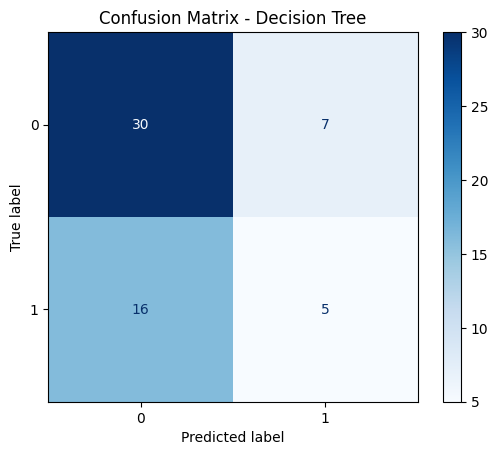

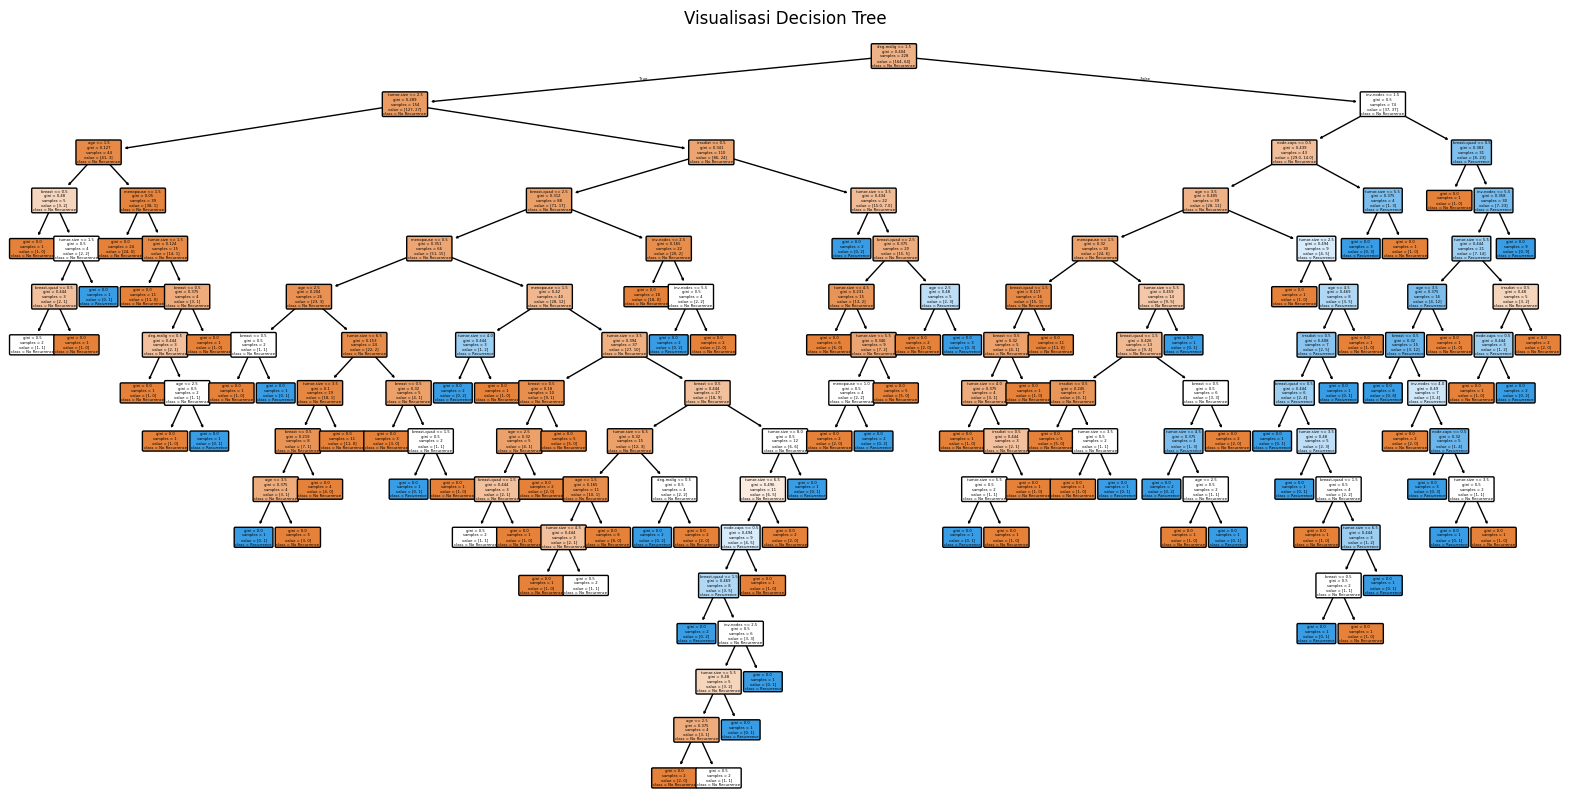

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt_model.predict(X_test)

# Evaluasi
print("=== Decision Tree ===")
print("Akurasi:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Visualisasi pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Recurrence', 'Recurrence'], rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()

Hasil yang didapat :

Model Decision Tree menghasilkan akurasi sekitar 60,34%, yang berarti dari seluruh data uji, sekitar 60% berhasil diklasifikasikan dengan benar. Model ini cukup baik dalam mengenali kasus tanpa kekambuhan (kelas 0), ditunjukkan oleh recall sebesar 81% dan f1-score sebesar 0,72 pada kelas ini.

Namun, performanya menurun drastis pada kelas kekambuhan (kelas 1). Recall-nya hanya 24%, menunjukkan bahwa model sering gagal mendeteksi pasien yang mengalami kekambuhan. F1-score di kelas ini juga rendah, hanya 0,30, menunjukkan keseimbangan antara precision dan recall yang buruk.

## Modelling Klasifikasi Dataset Cancer menggunakan KNN


Model K-Nearest Neighbors (KNN) digunakan dalam pemodelan ini untuk memprediksi status pasien apakah termasuk dalam kategori Recurrence (kanker kambuh) atau No Recurrence (tidak kambuh), berdasarkan fitur-fitur hasil biopsi seperti radius, perimeter, tekstur, dan area sel.

KNN adalah metode instance-based learning, di mana proses prediksi pada data baru dilakukan dengan membandingkan jaraknya terhadap data latih, lalu menentukan kelas berdasarkan mayoritas “tetangga” terdekatnya.

### **1. Pembagian Dataset: Training dan Testing**

 Sama seperti metode supervised learning lainnya, dataset dibagi menjadi dua bagian:

  - Data Latih (Training Set): Digunakan sebagai referensi dalam pencarian tetangga terdekat.

  - Data Uji (Testing Set): Digunakan untuk mengevaluasi kemampuan model dalam mengenali pola pada data yang belum pernah dilihat.

  Pada pemodelan ini digunakan rasio 80% data latih dan 20% data uji, yang merupakan pembagian umum dalam eksperimen machine learning. Rasio ini bisa disesuaikan tergantung ukuran dan keseimbangan data.


### **2. Pra-Pemrosesan Data**

  Agar algoritma KNN bekerja secara optimal, dilakukan beberapa langkah pra-pemrosesan sebagai berikut:

- Konversi Target: Kolom class yang berisi angka 0 dan 1 diubah menjadi label kategori:

  - 0 → Non Recurrence
  - 1 → Recurrence

- Encoding Fitur Kategorikal: Jika terdapat fitur kategorikal, maka perlu diubah ke bentuk numerik agar bisa digunakan dalam perhitungan jarak.

- Normalisasi (Scaling): Karena KNN sangat sensitif terhadap skala fitur, maka semua fitur numerik perlu dinormalisasi (misalnya menggunakan StandardScaler) agar setiap fitur memiliki kontribusi yang setara dalam perhitungan jarak. Tanpa scaling, fitur dengan rentang nilai besar akan mendominasi jarak Euclidean.



### **3. Konsep Kerja KNN**

  Berbeda dengan model seperti Decision Tree yang membangun aturan eksplisit, KNN bekerja berdasarkan kemiripan antar titik data. Berikut alur klasifikasinya:

  - Hitung jarak (misalnya Euclidean) antara data uji dan semua data latih.

  - Pilih k tetangga terdekat (pada kode ini digunakan k=5)..

  - Lakukan voting mayoritas terhadap label dari 5 tetangga tersebut.

  - Kelas yang paling banyak muncul akan menjadi hasil prediksi akhir.

  Misalnya, jika dari 5 tetangga terdekat, 3 adalah pasien dengan status Recurrence dan 2 No Recurrence, maka data uji akan diprediksi sebagai Recurrence.


### **4. Evaluasi Model**

 Setelah dilakukan prediksi, performa model KNN dievaluasi dengan beberapa metrik umum klasifikasi:

  - Akurasi: Mengukur seberapa banyak prediksi model yang sesuai dengan label asli.

  - Classification Report: Memberikan metrik precision, recall, dan F1-score untuk setiap kelas.

  - Confusion Matrix: Menunjukkan distribusi prediksi benar dan salah untuk kedua kelas, memudahkan analisis kesalahan klasifikasi.

  Eksperimen terhadap nilai k juga dapat dilakukan (misalnya: k=3, k=7, dst.) untuk mencari jumlah tetangga yang menghasilkan akurasi terbaik.



### **Kesimpulan**

 Model K-Nearest Neighbors menunjukkan performa yang cukup baik dalam mengklasifikasikan status kanker berdasarkan fitur-fitur klinis pasien. Selama data telah melalui proses pra-pemrosesan seperti encoding dan normalisasi, KNN dapat menjadi metode klasifikasi yang sederhana namun efektif.

Metode ini sangat cocok digunakan sebagai sistem pendukung keputusan di bidang medis, karena dapat membantu memprediksi potensi kekambuhan kanker secara cepat, bahkan sebelum dilakukan pemeriksaan lebih lanjut yang lebih kompleks.

=== K-Nearest Neighbors (KNN) ===
Akurasi: 0.5862068965517241

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.89      0.73        37
           1       0.20      0.05      0.08        21

    accuracy                           0.59        58
   macro avg       0.41      0.47      0.41        58
weighted avg       0.47      0.59      0.50        58

Confusion Matrix:


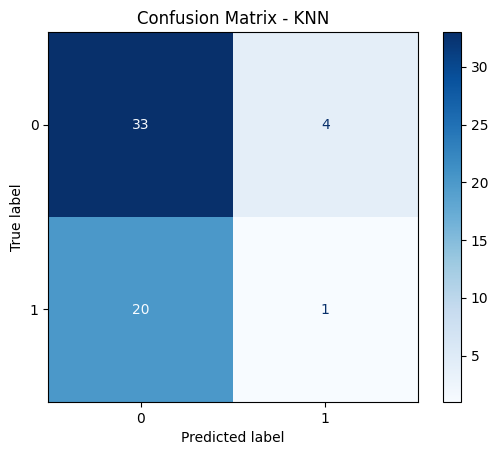

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn_model.predict(X_test)

# Evaluasi
print("=== K-Nearest Neighbors (KNN) ===")
print("Akurasi:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()

Hasil yang didapat :

Model KNN memberikan akurasi sekitar 58,62%, sedikit lebih rendah dari Decision Tree. Sama seperti model sebelumnya, KNN juga sangat baik dalam mengenali kelas 0 (tidak kambuh), bahkan recall-nya mencapai 89%.

Namun kelemahan utamanya adalah performa yang sangat buruk dalam mengenali kelas 1 (kekambuhan). Recall hanya 5%, artinya hampir semua kasus kekambuhan tidak dikenali oleh model. F1-score-nya pun hanya 0,08, menjadikan model ini sangat tidak seimbang karena terlalu condong pada kelas mayoritas.

## Modelling Klasifikasi Dataset Cancer menggunakan Naive Bayes

Modelling ini bertujuan untuk proses membangun model untuk memprediksi apakah pasien mengalami Recurrence (kanker kambuh) atau No Recurrence (tidak kambuh), berdasarkan fitur-fitur medis seperti radius, area, dan tekstur sel.

Naive Bayes bekerja dengan menghitung probabilitas suatu data termasuk ke dalam kelas tertentu, dengan asumsi bahwa fitur-fitur bersifat independen. Metode ini cepat, sederhana, dan efektif, sehingga cocok digunakan untuk deteksi dini kanker.


### **1.  Pembagian Dataset menjadi Data Latih dan Data Uji**

Langkah awal dalam proses modeling adalah membagi data menjadi dua bagian:

- Data Latih (Train Set): digunakan untuk membangun dan melatih model.

- Data Uji (Test Set): digunakan untuk  menguji performa model terhadap data yang belum pernah dilihat sebelumnya.

  Dalam modeling ini digunakan rasio 80% data latih dan 20% data uji, yang merupakan pembagian umum. Rasio ini bersifat fleksibel dan dapat disesuaikan tergantung kebutuhan dan ukuran dataset.



### **2. Menghitung Probabilitas Awal (Prior Probability)**

Setelah data dibagi, langkah selanjutnya adalah menghitung probabilitas awal (prior) untuk masing-masing kelas target, yaitu:
- Recurrence
- No Recurrence

Probabilitas ini dihitung dengan cara:

- Hitung jumlah data latih yang termasuk ke dalam masing-masing kelas.

- Bagi jumlah tersebut dengan total data latih.

Nilai prior ini mewakili kemungkinan awal seorang pasien termasuk salah satu kelas tanpa mempertimbangkan fitur apapun.



### **3. Menghitung Rata-rata dan Standar Deviasi Setiap Fitur**

Untuk masing-masing kelas model menghitung:

- Rata-rata (mean) dari setiap fitur numerik

- Standar deviasi (standard deviation) dari setiap fitur.

Hal ini penting karena Gaussian Naive Bayes mengasumsikan bahwa nilai-nilai fitur dalam setiap kelas mengikuti distribusi normal. Nilai rata-rata dan deviasi inilah yang akan digunakan dalam perhitungan probabilitas selanjutnya.

### **4. Menghitung Distribusi Gaussian**

Menggunakan rumus distribusi Gaussian, probabilitas kemunculan nilai fitur dihitung menggunakan rumus distribusi Gaussian sebagai berikut:


$$
P(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

Keterangan:

- $x$: nilai fitur input
- $\mu$: rata-rata fitur pada kelas tertentu
- $\sigma$: standar deviasi fitur pada kelas tertentu



### **5. Menghitung Posterior Probability**

Selanjutnya, semua probabilitas dari setiap fitur akan digabungkan untuk menghasilkan probabilitas akhir (posterior) dari masing-masing kelas menggunakan rumus:

$$
P(C_i|X) \propto P(x_1|C_i) \cdot P(x_2|C_i) \cdot \ldots \cdot P(x_n|C_i) \cdot P(C_i)
$$

Keterangan:

- $P(x_k|C_i)$: hasil dari fungsi Gaussian fitur ke-$k$ pada kelas $C_i$
- $P(C_i)$: prior probability dari kelas $C_i$



### **6. Menentukan Prediksi Kelas**

Setelah menghitung semua nilai posterior untuk masing-masing kelas, model akan memilih kelas dengan probabilitas tertinggi sebagai hasil prediksi akhir untuk data uji tersebut.


 ### **Kesimpulan**

Model Gaussian Naive Bayes sangat cocok digunakan dalam klasifikasi status kanker karena:

- Cepat dan efisien, terutama untuk dataset berukuran sedang

- Tidak memerlukan banyak parameter dan dapat langsung digunakan pada data numerik yang mengikuti distribusi normal.

- Tetap dapat bekerja meskipun antar fitur tidak saling bergantung secara statistik

Model ini sangat berguna sebagai alat bantu diagnosis awal kanker. Ketika diintegrasikan ke dalam sistem pendukung keputusan (Decision Support System), model ini dapat membantu dokter dalam mendeteksi risiko kekambuhan kanker dengan lebih cepat dan tepat, tanpa menunggu hasil pengujian lanjutan yang lebih kompleks.

=== Naive Bayes ===
Akurasi: 0.6551724137931034

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.84      0.76        37
           1       0.54      0.33      0.41        21

    accuracy                           0.66        58
   macro avg       0.61      0.59      0.58        58
weighted avg       0.63      0.66      0.63        58

Confusion Matrix:


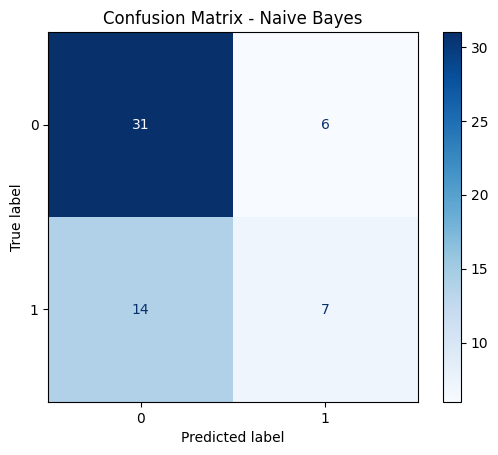

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Prediksi
y_pred_nb = nb_model.predict(X_test)

# Evaluasi
print("=== Naive Bayes ===")
print("Akurasi:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

Hasil yang didapat :

Naive Bayes adalah model dengan performa paling baik dari ketiganya, dengan akurasi sebesar 65,52%. Untuk kelas 0, model masih menunjukkan performa yang baik dengan recall 84% dan f1-score 0,76.

Yang membedakan adalah kemampuannya menangkap kelas minoritas (kelas 1 - kekambuhan) lebih baik dibanding model lain. Recall-nya mencapai 33% dan f1-score 0,41. Meskipun tidak terlalu tinggi, angka ini menunjukkan bahwa Naive Bayes memiliki kemampuan lebih seimbang dalam mengenali kedua kelas dibanding dua model sebelumnya.

## **Evaluasi Model**

Berdasarkan hasil evaluasi:

**Decision Tree**:

Akurasi: 60,34%

F1-score kelas 1: 0,30

**KNN**:

Akurasi: 58,62%

F1-score kelas 1: 0,08

**Naive Bayes**:

Akurasi: 65,52%

F1-score kelas 1: 0,41

Maka, Naive Bayes adalah model terbaik di antara ketiganya, karena memiliki akurasi tertinggi dan mampu mengenali kelas minoritas (recurrence) lebih baik dibanding Decision Tree maupun KNN. Model ini paling layak digunakan jika tujuan utama adalah mendeteksi pasien yang mengalami kekambuhan kanker payudara.